# EDA

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/data.csv', encoding='latin1')

# Display the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Basic information
data_info = data.info()

# Summary statistics for numerical columns
summary_stats = data.describe()

# Missing values in each column
missing_values = data.isnull().sum()

data_info, summary_stats, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425166 entries, 0 to 425165
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    425166 non-null  object 
 1   StockCode    425165 non-null  object 
 2   Description  423804 non-null  object 
 3   Quantity     425165 non-null  float64
 4   InvoiceDate  425165 non-null  object 
 5   UnitPrice    425165 non-null  float64
 6   CustomerID   318653 non-null  float64
 7   Country      425165 non-null  object 
dtypes: float64(3), object(5)
memory usage: 26.0+ MB


(None,
             Quantity      UnitPrice     CustomerID
 count  425165.000000  425165.000000  318653.000000
 mean        9.841671       4.709499   15276.288587
 std       170.266954     101.653624    1714.015826
 min    -74215.000000  -11062.060000   12346.000000
 25%         1.000000       1.250000   13895.000000
 50%         3.000000       2.100000   15144.000000
 75%        12.000000       4.130000   16776.000000
 max     74215.000000   38970.000000   18287.000000,
 InvoiceNo           0
 StockCode           1
 Description      1362
 Quantity            1
 InvoiceDate         1
 UnitPrice           1
 CustomerID     106513
 Country             1
 dtype: int64)

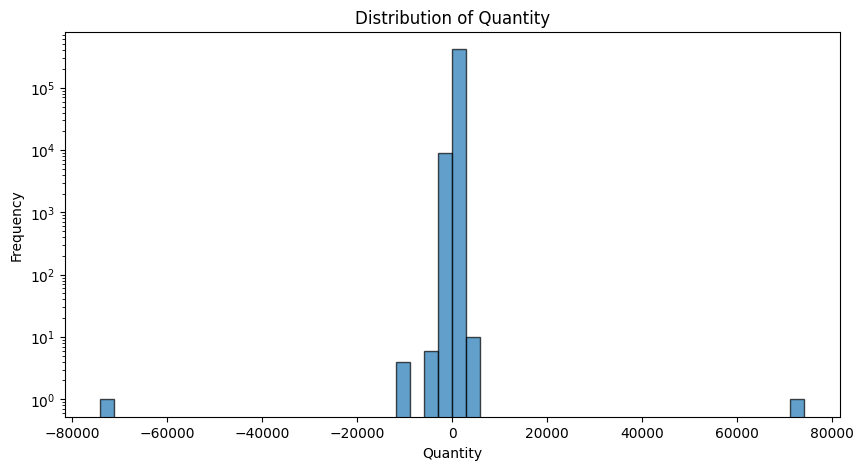

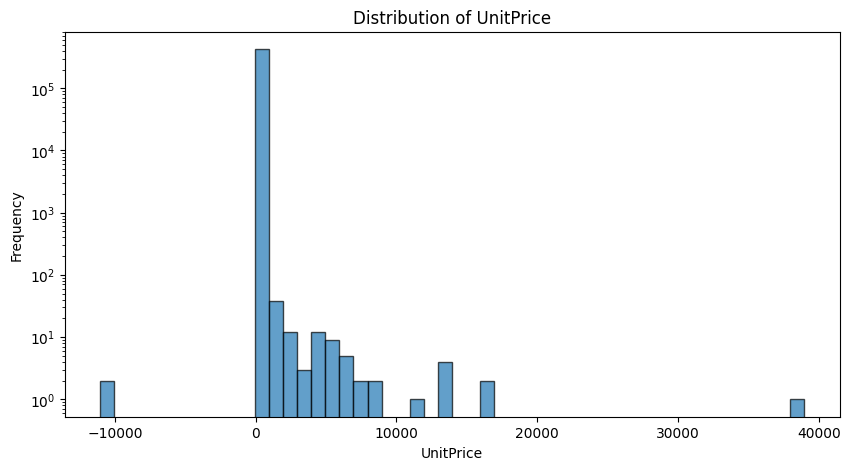

In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of Quantity
plt.figure(figsize=(10, 5))
plt.hist(data['Quantity'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# Visualize the distribution of UnitPrice
plt.figure(figsize=(10, 5))
plt.hist(data['UnitPrice'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [ ]:
# Remove rows with negative Quantity and UnitPrice
data_cleaned = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Handle missing values:
# Drop rows where Description is missing
data_cleaned = data_cleaned.dropna(subset=['Description'])

# For CustomerID, we can either fill with a placeholder or drop them
# Here, we'll fill with a placeholder 'Unknown' to keep the rows
data_cleaned['CustomerID'].fillna('Unknown', inplace=True)

# Verify the cleaning process
cleaned_missing_values = data_cleaned.isnull().sum()

cleaned_missing_values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

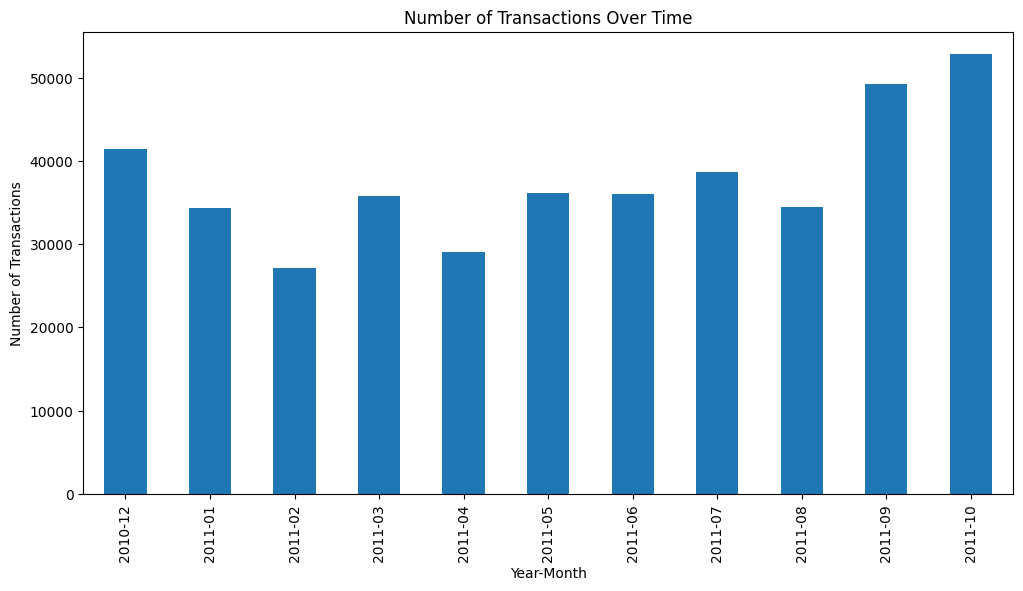

In [ ]:
# Convert InvoiceDate to datetime format
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Extract date related features
data_cleaned['InvoiceYearMonth'] = data_cleaned['InvoiceDate'].dt.to_period('M')

# Visualize the distribution of transactions over time
plt.figure(figsize=(12, 6))
data_cleaned['InvoiceYearMonth'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


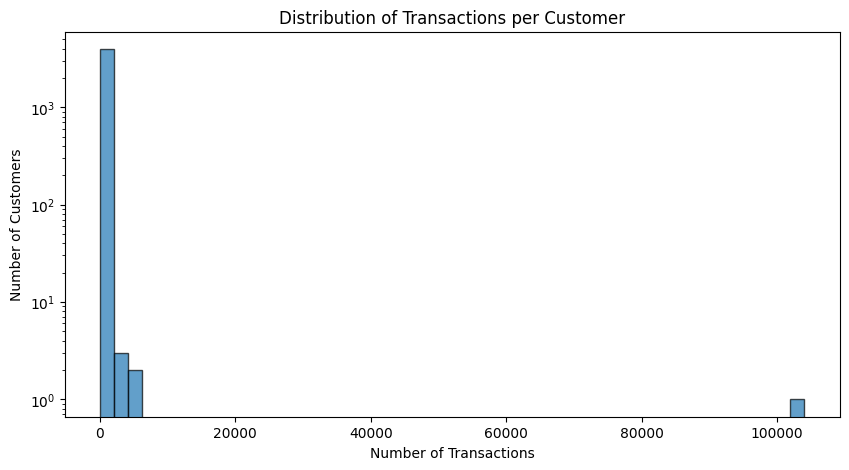

(3948,
 count      3948.000000
 mean        105.159068
 std        1663.741628
 min           1.000000
 25%          15.750000
 50%          37.000000
 75%          87.000000
 max      104018.000000
 Name: count, dtype: float64)

In [ ]:
# Unique customers
unique_customers = data_cleaned['CustomerID'].nunique()

# Transactions per customer
transactions_per_customer = data_cleaned['CustomerID'].value_counts()

# Visualize the distribution of transactions per customer
plt.figure(figsize=(10, 5))
plt.hist(transactions_per_customer, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.yscale('log')
plt.show()

unique_customers, transactions_per_customer.describe()

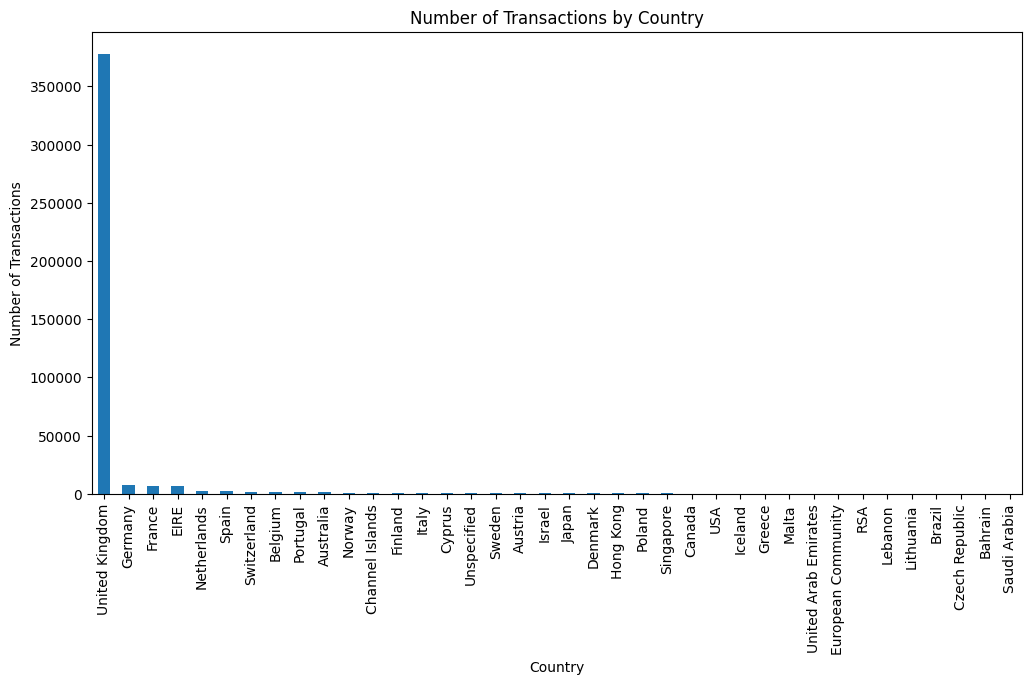

In [ ]:
# Transactions by country
transactions_by_country = data_cleaned['Country'].value_counts()

# Visualize the distribution of transactions by country
plt.figure(figsize=(12, 6))
transactions_by_country.plot(kind='bar')
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

# K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

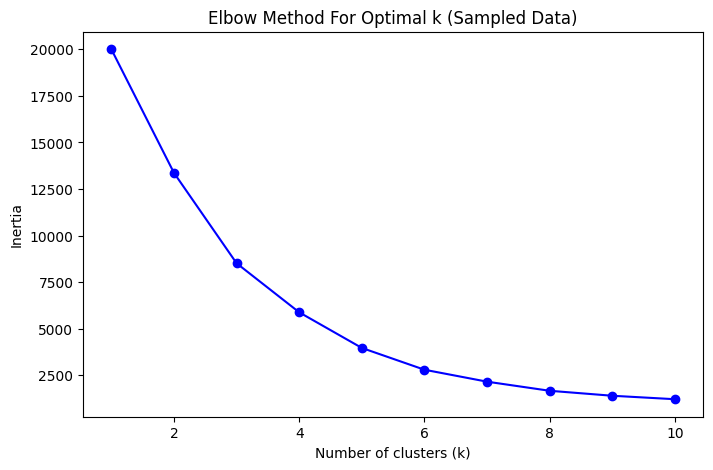

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Sample the dataset
sampled_data = data_cleaned.sample(n=10000, random_state=42)

# Feature selection
sampled_features = sampled_data[['Quantity', 'UnitPrice']]

# Normalization
scaler = StandardScaler()
sampled_features_scaled = scaler.fit_transform(sampled_features)

# Determine the optimal number of clusters using the Elbow method
inertia_sampled = []
K_sampled = range(1, 11)
for k in K_sampled:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sampled_features_scaled)
    inertia_sampled.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_sampled, inertia_sampled, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (Sampled Data)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


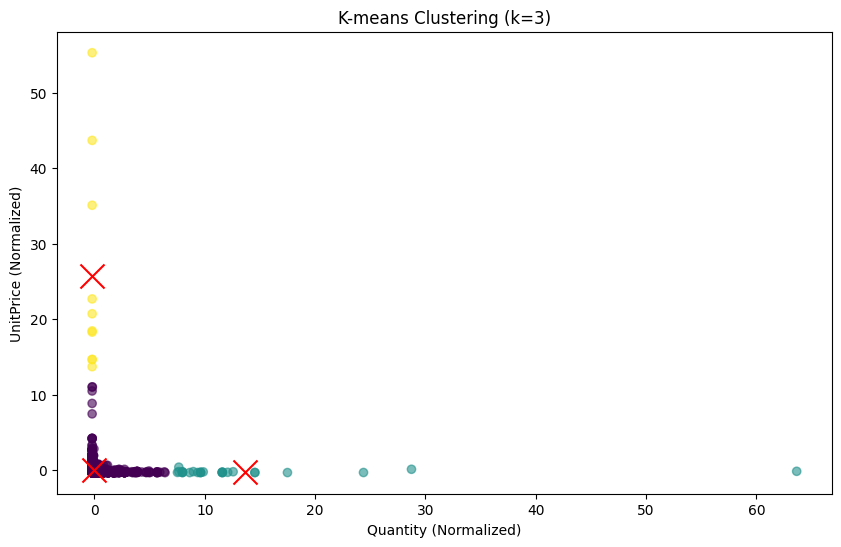

In [ ]:
# Apply K-means with the optimal number of clusters (k=3)
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
sampled_data['Cluster'] = kmeans_optimal.fit_predict(sampled_features_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sampled_features_scaled[:, 0], sampled_features_scaled[:, 1], c=sampled_data['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('K-means Clustering (k=3)')
plt.xlabel('Quantity (Normalized)')
plt.ylabel('UnitPrice (Normalized)')
plt.show()

# DBSCAN

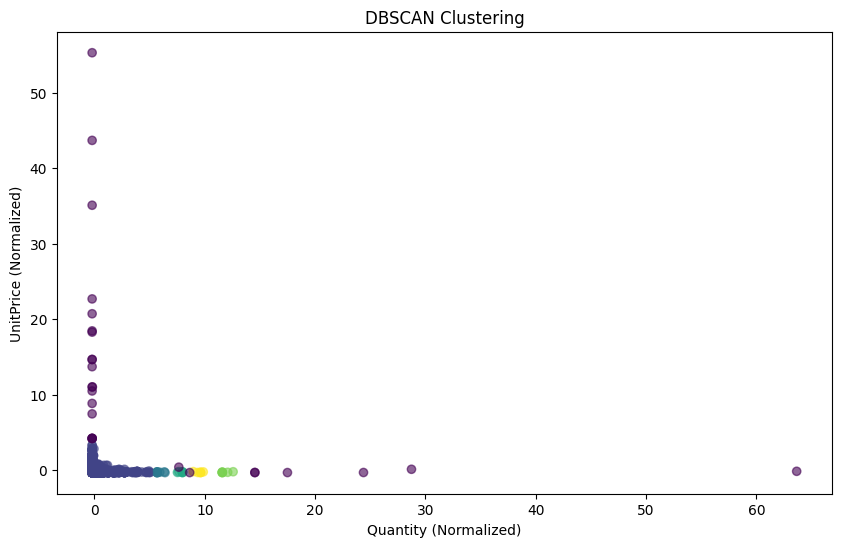

Number of clusters: 6
Number of noise points: 27


In [ ]:
from sklearn.cluster import DBSCAN

# Sample the dataset for DBSCAN
sampled_data_dbscan = data_cleaned.sample(n=10000, random_state=42)

# Feature selection
sampled_features_dbscan = sampled_data_dbscan[['Quantity', 'UnitPrice']]

# Normalization
scaler = StandardScaler()
sampled_features_scaled_dbscan = scaler.fit_transform(sampled_features_dbscan)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
sampled_data_dbscan['Cluster'] = dbscan.fit_predict(sampled_features_scaled_dbscan)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sampled_features_scaled_dbscan[:, 0], sampled_features_scaled_dbscan[:, 1], c=sampled_data_dbscan['Cluster'], cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Quantity (Normalized)')
plt.ylabel('UnitPrice (Normalized)')
plt.show()

# Display number of clusters and noise points
n_clusters = len(set(sampled_data_dbscan['Cluster'])) - (1 if -1 in sampled_data_dbscan['Cluster'] else 0)
n_noise = list(sampled_data_dbscan['Cluster']).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Silhoutette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

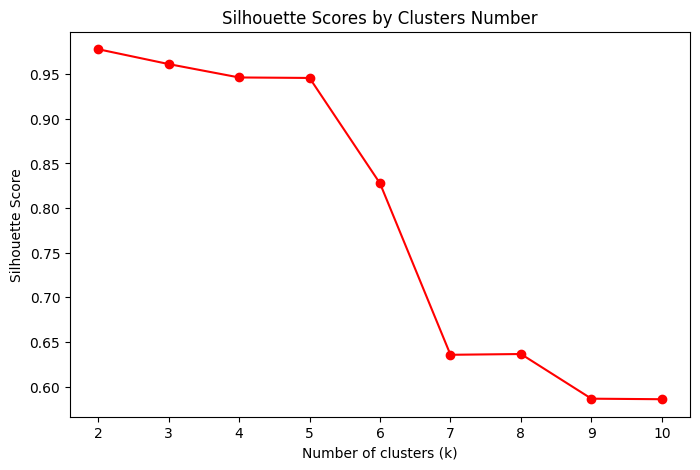

In [ ]:
from sklearn.metrics import silhouette_score

inertia_sampled = []
silhouette_scores = []
K_sampled = range(2, 11)  # Start from 2 as silhouette score cannot be calculated for k=1
for k in K_sampled:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(sampled_features_scaled)
    inertia_sampled.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sampled_features_scaled, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_sampled, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores by Clusters Number')
plt.show()

In [ ]:

# Filter out the noise points for Silhouette computation
mask = sampled_data_dbscan['Cluster'] != -1
filtered_data = sampled_features_scaled_dbscan[mask]
filtered_labels = sampled_data_dbscan['Cluster'][mask]

# Compute Silhouette Score
if len(set(filtered_labels)) > 1:  # Check if there's more than one cluster (excluding noise)
    silhouette_avg = silhouette_score(filtered_data, filtered_labels)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Not enough clusters to compute Silhouette Score.")


Silhouette Score: 0.9156009826950731


# Davies-Bouldin Index

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(sampled_features_scaled, sampled_data['Cluster'])
print(f'Davies-Bouldin Index for K-means with k=3: {db_index}')

Davies-Bouldin Index for K-means with k=3: 0.5609747179497225


In [ ]:
# Filter out the noise points for Davies-Bouldin computation
mask = sampled_data_dbscan['Cluster'] != -1
filtered_data = sampled_features_scaled_dbscan[mask]
filtered_labels = sampled_data_dbscan['Cluster'][mask]

# Compute Davies-Bouldin Index
if len(set(filtered_labels)) > 1:  # Check if there's more than one cluster (excluding noise)
    davies_bouldin_avg = davies_bouldin_score(filtered_data, filtered_labels)
    print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
else:
    print("Not enough clusters to compute Davies-Bouldin Index.")

Davies-Bouldin Index: 0.20953027104696167


# Calinski-Harabasz Index

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Compute Calinski-Harabasz Index
ch_index = calinski_harabasz_score(sampled_features_scaled, sampled_data['Cluster'])
print(f'Calinski-Harabasz Index for K-means with k=3: {ch_index}')

Calinski-Harabasz Index for K-means with k=3: 6740.402144807768


In [ ]:
# Filter out noise points
mask = sampled_data_dbscan['Cluster'] != -1
filtered_data = sampled_features_scaled_dbscan[mask]
filtered_labels = sampled_data_dbscan['Cluster'][mask]

# Compute Calinski-Harabasz Index
if len(set(filtered_labels)) > 1 and all(filtered_labels.value_counts() > 1):
    ch_index = calinski_harabasz_score(filtered_data, filtered_labels)
    print(f'Calinski-Harabasz Index for DBSCAN: {ch_index}')
else:
    print("Not enough valid clusters to compute Calinski-Harabasz Index.")


Calinski-Harabasz Index for DBSCAN: 2005.0146401073307


# Feature Selection


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


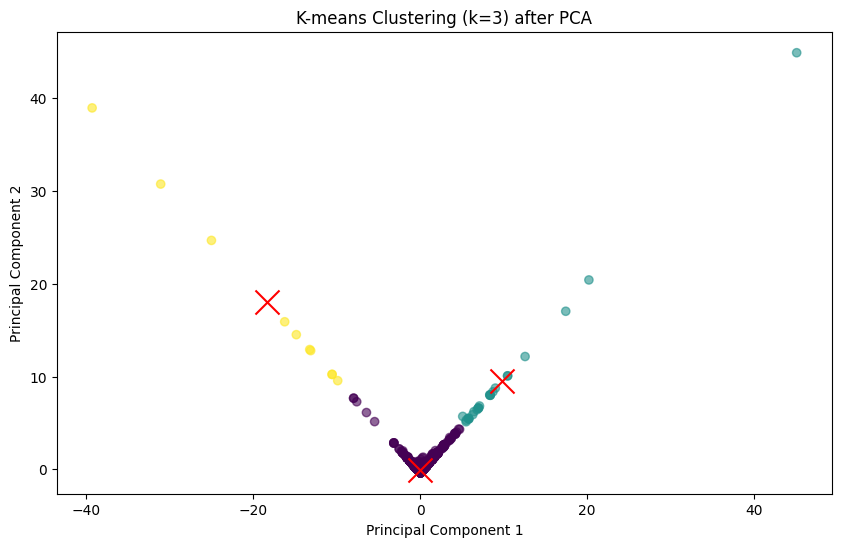

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply PCA to reduce dimensions to 2 for better visualization and potentially improved clustering
pca = PCA(n_components=2)
sampled_features_pca = pca.fit_transform(sampled_features_scaled)

# Apply K-means with the optimal number of clusters (k=3)
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
sampled_data['Cluster'] = kmeans_optimal.fit_predict(sampled_features_pca)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sampled_features_pca[:, 0], sampled_features_pca[:, 1], c=sampled_data['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('K-means Clustering (k=3) after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


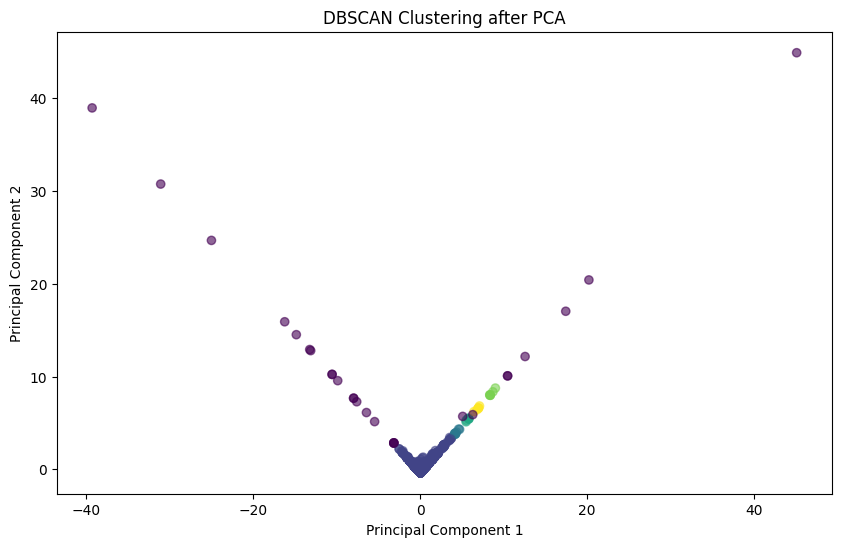

Number of clusters: 6
Number of noise points: 27


In [ ]:
# Sample the dataset for DBSCAN
sampled_data_dbscan = data_cleaned.sample(n=10000, random_state=42)

# Feature selection
sampled_features_dbscan = sampled_data_dbscan[['Quantity', 'UnitPrice']]

# Normalization
scaler = StandardScaler()
sampled_features_scaled_dbscan = scaler.fit_transform(sampled_features_dbscan)

# Apply PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization and potential clustering improvement
sampled_features_pca_dbscan = pca.fit_transform(sampled_features_scaled_dbscan)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
sampled_data_dbscan['Cluster'] = dbscan.fit_predict(sampled_features_pca_dbscan)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sampled_features_pca_dbscan[:, 0], sampled_features_pca_dbscan[:, 1], c=sampled_data_dbscan['Cluster'], cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display number of clusters and noise points
n_clusters = len(set(sampled_data_dbscan['Cluster'])) - (1 if -1 in sampled_data_dbscan['Cluster'] else 0)
n_noise = list(sampled_data_dbscan['Cluster']).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')


# Deployment

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Load and preprocess data
@st.cache
def load_data():
    data = pd.read_csv('data.csv', encoding='latin1')
    data_cleaned = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
    data_cleaned['CustomerID'].fillna('Unknown', inplace=True)
    return data_cleaned

data_cleaned = load_data()

# Sidebar - Clustering options
st.sidebar.title('Clustering Options')
algorithm = st.sidebar.selectbox('Select Algorithm', ['K-Means', 'DBSCAN'])

if algorithm == 'K-Means':
    n_clusters = st.sidebar.slider('Number of Clusters', min_value=2, max_value=10, value=3)
else:
    eps = st.sidebar.slider('Epsilon (eps)', min_value=0.1, max_value=2.0, value=0.5)
    min_samples = st.sidebar.slider('Minimum Samples', min_value=5, max_value=100, value=5)

# Clustering
def cluster_data(method, **kwargs):
    features = data_cleaned[['Quantity', 'UnitPrice']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features_scaled)

    if method == 'K-Means':
        model = KMeans(n_clusters=kwargs['n_clusters'], random_state=42)
    elif method == 'DBSCAN':
        model = DBSCAN(eps=kwargs['eps'], min_samples=kwargs['min_samples'])

    data_cleaned['Cluster'] = model.fit_predict(features_pca)
    return features_pca, data_cleaned['Cluster']

# Plotting
def plot_clusters(features_pca, clusters):
    plt.figure(figsize=(10, 6))
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.title(f'{algorithm} Clustering Results')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    st.pyplot(plt)

# Main
if st.sidebar.button('Cluster'):
    if algorithm == 'K-Means':
        features_pca, clusters = cluster_data('K-Means', n_clusters=n_clusters)
    else:
        features_pca, clusters = cluster_data('DBSCAN', eps=eps, min_samples=min_samples)
    plot_clusters(features_pca, clusters)

st.title('Clustering Application')
st.write('This application performs clustering on the provided dataset using selected parameters.')
